In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639657 sha256=b494a0196f13871155b05feea79361d05acf88f3208b55f9d19089718f2bd317
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/fbp.csv')
df

,Date,Close,Open,High,Low,Volume,Change %
0,2011-01,19931,20559,20687,19486,755810,-3.04%
1,2011-02,20682,19980,20948,19676,404790,3.77%
2,2011-03,20697,20727,21273,20457,750060,0.07%
3,2011-04,22703,20730,22734,20511,426010,9.69%
4,2011-05,22454,22530,22698,21521,925560,-1.10%
...,...,...,...,...,...,...,...
127,2021-08,47060,48094,48300,45708,216820,-1.76%
128,2021-09,46221,47060,47599,45488,255700,-1.78%
129,2021-10,47502,46303,48140,46125,235430,2.77%
130,2021-11,47439,47649,49579,46839,263410,-0.13%


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop= True, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      132 non-null    object
 1   Close     132 non-null    int64 
 2   Open      132 non-null    int64 
 3   High      132 non-null    int64 
 4   Low       132 non-null    int64 
 5   Volume    132 non-null    int64 
 6   Change %  132 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.3+ KB


In [ ]:
df.head()

,Date,Close,Open,High,Low,Volume,Change %
0,2011-01,19931,20559,20687,19486,755810,-3.04%
1,2011-02,20682,19980,20948,19676,404790,3.77%
2,2011-03,20697,20727,21273,20457,750060,0.07%
3,2011-04,22703,20730,22734,20511,426010,9.69%
4,2011-05,22454,22530,22698,21521,925560,-1.10%


In [ ]:
df = df[["Date","Close"]]
df.head()

,Date,Close
0,2011-01,19931
1,2011-02,20682
2,2011-03,20697
3,2011-04,22703
4,2011-05,22454


In [ ]:
df.columns=['ds','y']

In [ ]:
df['ds']=pd.to_datetime(df['ds'])
print(df)

            ds      y
0   2011-01-01  19931
1   2011-02-01  20682
2   2011-03-01  20697
3   2011-04-01  22703
4   2011-05-01  22454
..         ...    ...
127 2021-08-01  47060
128 2021-09-01  46221
129 2021-10-01  47502
130 2021-11-01  47439
131 2021-12-01  47994

[132 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



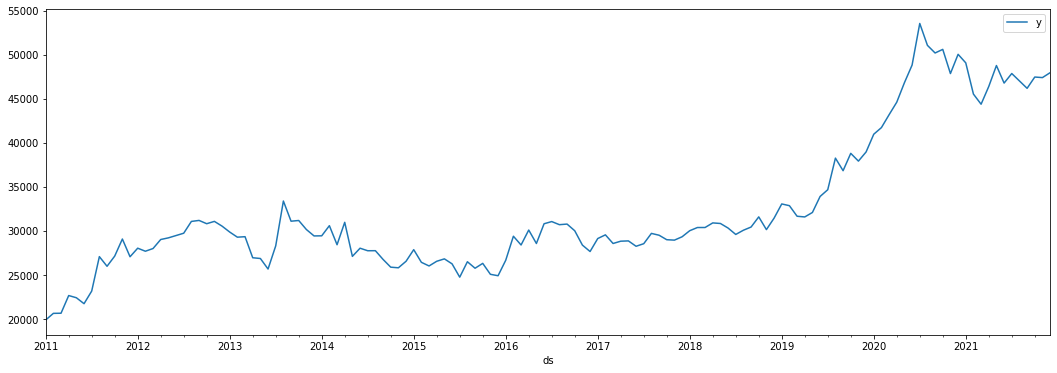

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

132

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)+365:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=48)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,2021-01-14,51662.132836,55335.946993,59791.828976,51650.027694,51667.617663,5824.033269,5824.033269,5824.033269,5824.033269,5824.033269,5824.033269,0.0,0.0,0.0,57486.166105
164,2021-01-15,51687.529323,55605.747495,59865.886842,51673.840114,51693.520382,6022.101878,6022.101878,6022.101878,6022.101878,6022.101878,6022.101878,0.0,0.0,0.0,57709.631201
165,2021-01-16,51712.925810,55559.515452,60015.651833,51697.396342,51719.532258,6147.666923,6147.666923,6147.666923,6147.666923,6147.666923,6147.666923,0.0,0.0,0.0,57860.592733
166,2021-01-17,51738.322297,55751.692367,60148.202439,51722.281161,51745.915430,6198.113809,6198.113809,6198.113809,6198.113809,6198.113809,6198.113809,0.0,0.0,0.0,57936.436106
167,2021-01-18,51763.718783,55582.539346,60125.969111,51747.133036,51771.974205,6172.158396,6172.158396,6172.158396,6172.158396,6172.158396,6172.158396,0.0,0.0,0.0,57935.877179


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,2021-01-14,57486.166105,55335.946993,59791.828976
164,2021-01-15,57709.631201,55605.747495,59865.886842
165,2021-01-16,57860.592733,55559.515452,60015.651833
166,2021-01-17,57936.436106,55751.692367,60148.202439
167,2021-01-18,57935.877179,55582.539346,60125.969111


In [ ]:
test.tail()

,ds,y
127,2021-08-01,47060
128,2021-09-01,46221
129,2021-10-01,47502
130,2021-11-01,47439
131,2021-12-01,47994


In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:
print("Root Mean Square Error between actual and predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:",test['y'].mean())

Root Mean Square Error between actual and predicted values:  14016.66663182032
Mean Value of Test Dataset: 48342.767123287675


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2014-01-07 00:00:00 and 2019-12-07 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-08,29509.590495,27676.118524,31369.368398,28037.0,2014-01-07
1,2014-01-09,29568.325686,27815.590580,31333.337189,27679.0,2014-01-07
2,2014-01-10,29481.864835,27725.738617,31382.946520,26790.0,2014-01-07
3,2014-01-12,29446.799115,27719.382579,31146.871238,26546.0,2014-01-07
4,2014-01-13,29449.377975,27646.233556,31123.308770,29312.0,2014-01-07


In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=13, freq='M')

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
133,2022-01-31,53880.896807,50510.935577,57078.790602,52653.183744,52645.654812,52667.527532
134,2022-02-28,50807.363121,47386.792520,53897.691455,53102.129525,53078.181346,53135.854274
135,2022-03-31,53101.131021,49859.225202,56296.370448,53599.176638,53550.298784,53655.505569
136,2022-04-30,53750.436545,50323.841382,57360.526215,54080.189974,54001.746005,54168.040382
137,2022-05-31,54227.451268,50911.747861,57652.514862,54577.237088,54463.356649,54701.110723
138,2022-06-30,53548.112889,50020.537818,56708.286455,55058.250424,54911.738567,55227.678298
139,2022-07-31,57748.307396,54414.338432,61093.754102,55555.297538,55361.712601,55776.191516
140,2022-08-31,56029.056230,52844.900586,59424.664717,56052.344652,55801.359750,56315.999917
141,2022-09-30,57054.599760,53852.323756,60274.132669,56533.357988,56229.379893,56836.721435
142,2022-10-31,56654.968813,53306.876925,60054.734213,57030.405101,56665.136991,57387.832276


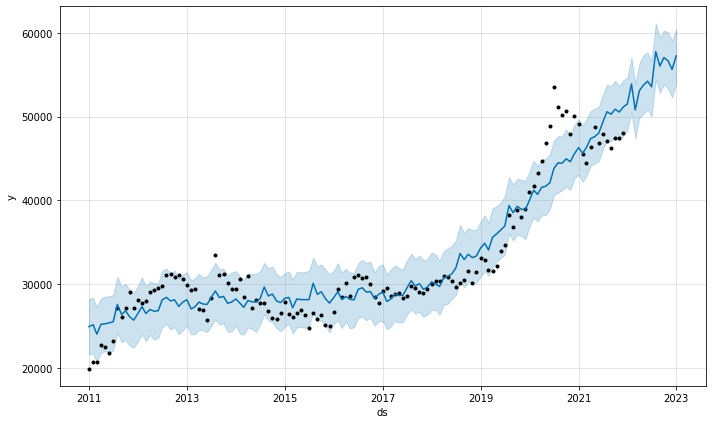

In [ ]:
fig1 = m.plot(forecast)

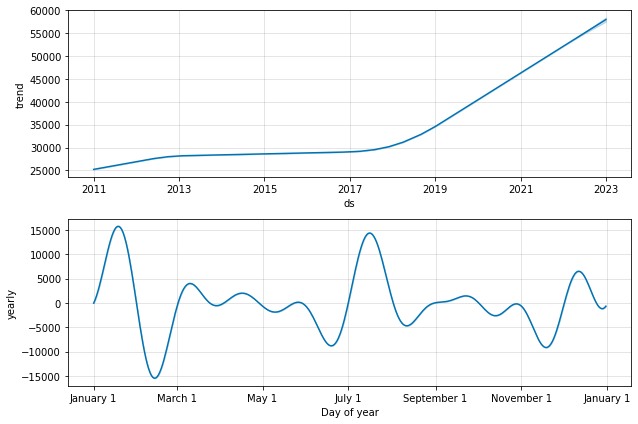

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

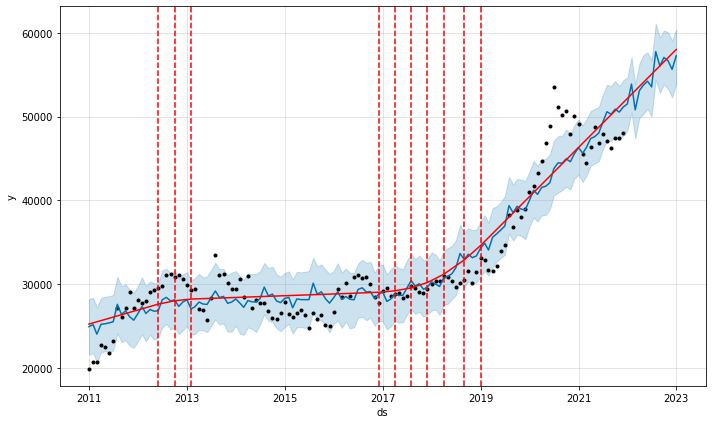

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)